In [1]:
!pip install CoolProp

In [2]:
from CoolProp.CoolProp import PropsSI

Consider a two-stage cascade refrigeration system. The refrigeration cycle cooling the cold refrigerated space is the process 1 to 4, termed "bottom cycle" (B). The cycle rejecting heat to the higher temperature environment is the process of 5 to 6, termed "upper cycle" (A). Heat is changed between the two cycles A and B occurs between processes 2-3 and 8-5. 

These cycles operate between the pressure limits of $p_1 = p_4$ and $p_6 = p_7$. Each stage operates on an ideal vapor-compression refrigeration cycle with refrigerant-134a as the working fluid. Heat rejection from the lower cycle to the upper cycle takes place in an adiabatic counterflow heat exchanger where both streams enter at approximately $p_2 = p_3$ which is equal to $p_8 = p_5$. 

We are asked the following questions:
- (a) What is the mass flow rate of the refrigerant through the "lower cycle" aka cycle B?
- (b) What is the rate of heat removal from the refrigerated space and the power input to the compressors? 
- (c) What is the coefficient of performance of this cascade refrigerator?
- (d) How does the efficiency compare to a single stage refrigeration system?

Here are the properties for cycle B.

In [32]:
# values that are given in the problem
P1 = 0.14*1e6 # Pa
P2 = 0.32*1e6
P6 = 0.8*1e6

fluidA = 'R134a'
fluidB = 'R134a'

In [4]:
# state 1
Q1 = 1 # quality
h1 = PropsSI('H','P',P1,'Q',Q1,fluidB)
s1 = PropsSI('S','P',P1,'Q',Q1,fluidB)
T1 = PropsSI('T','P',P1,'Q',Q1,fluidB)

In [5]:
# state 2
s2 = s1 # isentropic compressor
h2 = PropsSI('H','P',P2,'S',s2,fluidB)
s2 = PropsSI('S','P',P2,'S',s2,fluidB)
T2 = PropsSI('T','P',P2,'S',s2,fluidB)

In [6]:
# state 3
P3 = P2 # isobaric
Q3 = 0
h3 = PropsSI('H','P',P3,'Q',Q3,fluidB)
s3 = PropsSI('S','P',P3,'Q',Q3,fluidB)
T3 = PropsSI('T','P',P3,'Q',Q3,fluidB)

In [7]:
# state 4
P4 = P1 # isobaric
h4 = h3 # isenthalpic
s4 = PropsSI('S','P',P4,'H',h4,fluidB)
T4 = PropsSI('T','P',P4,'H',h4,fluidB)
Q4 = PropsSI('Q','P',P4,'H',h4,fluidB)

Here are the properties for cycle A:

In [8]:
# state 5
Q5 = 1 # saturated vapor 
P5 = P2
h5 = PropsSI('H','P',P5,'Q',Q5,fluidA)
s5 = PropsSI('S','P',P5,'Q',Q5,fluidA)
T5 = PropsSI('T','P',P5,'Q',Q5,fluidA)

In [9]:
# state 6
s6 = s5 # compressor operates isentropically 
# P6 is given above
h6 = PropsSI('H','P',P6,'S',s6,fluidA)
s6 = PropsSI('S','P',P6,'S',s6,fluidA)
T6 = PropsSI('T','P',P6,'S',s6,fluidA)

In [10]:
# state 7
P7 = P6 # isobaric process. Heat rejection at high pressures.
Q7 = 0 # vapor quality at the exit of the condenser is 0
h7 = PropsSI('H','P',P7,'Q',Q7,fluidA)
s7 = PropsSI('S','P',P7,'Q',Q7,fluidA)
T7 = PropsSI('T','P',P7,'Q',Q7,fluidA)

In [11]:
# state 8
h8 = h7 # isenthalpic process going from state 7 to 8
P8 = P5 # isobaric process going from state 8 to state 5
s8 = PropsSI('S','P',P8,'H',h8,fluidA)
T8 = PropsSI('T','P',P8,'H',h8,fluidA)
Q8 = PropsSI('Q','P',P8,'H',h8,fluidA)

The mass flow rate through the "upper" cycle is $\dot{m}_\text{A}$. 

In [12]:
mdotA_kgPerS = 0.05

In [13]:
QAL_W = mdotA_kgPerS*(h5 - h8)
print('The rate of heat removal from cycle A is {0:1.2f} W.'.format(QAL_W))

The rate of heat removal from cycle A is 7819.82 W.


In [14]:
WAin_W = mdotA_kgPerS*(h6 - h5)
print('The power input to the compressor in cycle A is {0:1.2f} W.'.format(WAin_W))

The power input to the compressor in cycle A is 950.13 W.


In [15]:
QAH_W = mdotA_kgPerS*(h2 - h3)
print('The heat rejected from cycle A to the environment is {0:1.2f} W.'.format(QAH_W))

The heat rejected from cycle A to the environment is 10036.41 W.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

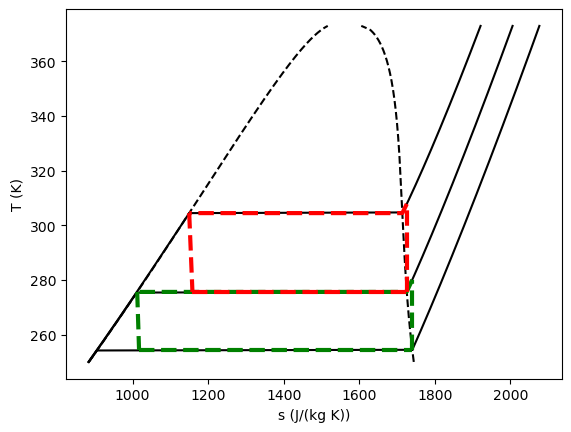

In [26]:
linetype14 = 'g--'
linewidth14 = 3

linetype58 = 'r--'
linewidth58 = 3

plt.figure()
plt.clf()
T = np.linspace(250, 373, 500) # range of temperatures
for P in [P1,P2,P6]: #MPa
    S = [PropsSI('S','P',P,'T',t,'R134a') for t in T]
    plt.plot(S, T, 'k-')

# saturated vapor and liquid entropy lines
svap = [PropsSI('S','T',t,'Q',1,'R134a') for t in T]
sliq = [PropsSI('S','T',t,'Q',0,'R134a') for t in T]

#sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'k--')
plt.plot(sliq, T, 'k--')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

plt.plot([s1, s2], [T1, T2], linetype14, lw=linewidth14) # Path 1 to 2

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,'R134a') for s in S23]
plt.plot(S23,T23, linetype14, lw=linewidth14)

plt.plot([s3, s4], [T3, T4], linetype14, lw=linewidth14) # path from 3 to 4 

T41 = np.linspace(T4, T1) 
Q41 = np.linspace(Q4, Q1)
S41 = [PropsSI('S','P',P4,'Q',q,'R134a') for q in Q41]
plt.plot(S41, T41, linetype14, lw=linewidth14) # and from 4 to 1 is isobaric

plt.plot([s5, s6], [T5, T6], linetype58, lw=linewidth58) # Path 5 to 6

S67 = np.linspace(s6, s7)
T67 = [PropsSI('T','P',P6,'S',s,'R134a') for s in S67]
plt.plot(S67,T67, linetype58, lw=linewidth58)

plt.plot([s7, s8], [T7, T8], linetype58, lw=linewidth58) # path from 7 to 8

T85 = np.linspace(T8, T5) 
Q85 = np.linspace(Q8, Q5)
S85 = [PropsSI('S','P',P8,'Q',q,'R134a') for q in Q85]
plt.plot(S85, T85, linetype58, lw=linewidth58) # and from 4 to 1 is isobaric

plt.savefig('cascadeRefrigerationR134a.png')

Again, the "bottom cycle", shown in green, is cycle "B", and the "upper cycle", shown in red, is cycle "A". 

To determine the mass flow rate of the refrigerant through cycle B, we need to match the heat transfer rates from processes 2-3 and 8-5. Specifically:

$$-\dot{Q}_\text{A,L} =  \dot{Q}_\text{B,H}$$

where the sign convention is heat into the cycle is positive and heat out of the cycle is negative.

In [27]:
QBH_W = -QAL_W

Since we know that $$\dot{Q}_\text{B,H} = \dot{m} \left( h_3 - h_2 \right) $$

$$\implies  \dot{m} = \frac{\dot{Q}_\text{B,H}}{\left( h_3 - h_2 \right)}$$

In [33]:
mdotB_kgPerS = QBH_W/(h3 - h2)

print('(a) The mass flow rate in cycle B is {0:1.3f} kg/s.'.format(mdotB_kgPerS))

(a) The mass flow rate in cycle B is 0.039 kg/s.


The rate of heat removal from the refrigerated space can be calculated from the process 4 to 1. Since we know the mass flow rate, we know that: $$\dot{Q}_\text{B,L} = \dot{m} \left(h_1 - h_4\right) $$

In [34]:
QBL_W = mdotB_kgPerS *(h1 - h4)
print('(b) The rate of heat removal from states 4 to 1 is {0:1.3f} W.'.format(QBL_W))

(b) The rate of heat removal from states 4 to 1 is 7167.516 W.


The power input to the compressors is the sum of the compressor for cycles A and B. That is:
$$\dot{W}_\text{in} = \dot{W}_\text{compressor A, in} + \dot{W}_\text{compressor B, in} $$

and

$$\dot{W}_\text{in} = \dot{m}\left(h_6 - h_6 \right) + \dot{m}\left(h_2 - h_1\right)$$.

The sign convention here is that energy transferred into the control volume is positive.

In [35]:
WdotIn_W = mdotA_kgPerS *(h6 - h5) + mdotB_kgPerS * (h2 - h1)
print('(b) The power input to the compressors is {0:1.3f} W.'.format(WdotIn_W))

(b) The power input to the compressors is 1602.439 W.


The coefficient of performance of any refrigeration system is the ratio of the rate that heat is removed from the refrigated space divided by the net power input:

$$\text{COP}_\text{R} = \frac{\dot{Q}_\text{B,L}}{\dot{W}_\text{in}} $$


In [36]:
COP_R = QBL_W/WdotIn_W
print('(c) The COP of the cascade refrigeration cycle is {0:1.3f}.'.format(COP_R))

(c) The COP of the cascade refrigeration cycle is 4.473.


We have analyzed a single-stage refrigeration system. How does this COP value for the cascade system compare to the single-stage system? 

In [44]:
# properties

P1_ = P1 # Pa
P2_ = P6
fluid = fluidA

mdot_kgPerS_ = mdotA_kgPerS

In [50]:
# state 1_
Q1_ = Q1 # quality
h1_ = PropsSI('H','P',P1_,'Q',Q1_,fluid)
s1_ = PropsSI('S','P',P1_,'Q',Q1_,fluid)
T1_ = PropsSI('T','P',P1_,'Q',Q1_,fluid)

In [51]:
# state 2_
s2_ = s1_
h2_ = PropsSI('H','P',P2_,'S',s2_,fluid)
T2_ = PropsSI('T','P',P2_,'S',s2_,fluid)

In [52]:
# state 3_
Q3_ = 0
P3_ = P2_

h3_ = PropsSI('H','P',P3_,'Q',Q3_,fluid)
s3_ = PropsSI('S','P',P3_,'Q',Q3_,fluid)
T3_ = PropsSI('T','P',P3_,'Q',Q3_,fluid)

In [54]:
# state 4_
h4_ = h3_
P4_ = P1_
s4_ = PropsSI('S','P',P4_,'H',h4_,fluid)
T4_ = PropsSI('T','P',P4_,'H',h4_,fluid)
Q4_ = PropsSI('Q','P',P4_,'H',h4_,fluid)

In [45]:
QL_ = mdot_kgPerS_*(h1_ - h4_); print(QL_)

7183.728141570221


In [47]:
Win_ = mdot_kgPerS_*(h2_ - h1_); print(Win_)

1810.5999346722529


In [49]:
COP = QL_/Win_
print('(d) The COP of the single stage refrigeration cycle is {0:1.3f}.'.format(COP))

(d) The COP of the single stage refrigeration cycle is 3.968.


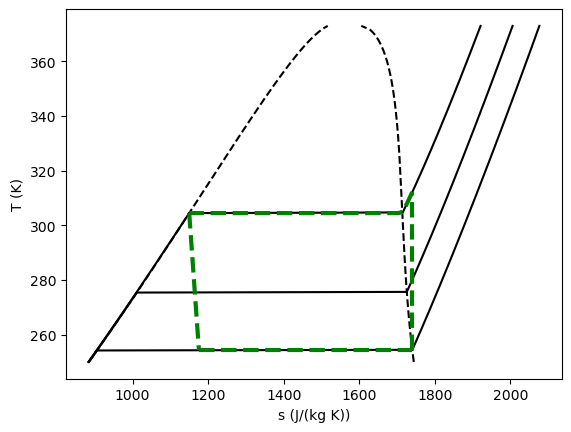

In [55]:
linetype14 = 'g--'
linewidth14 = 3

linetype58 = 'r--'
linewidth58 = 3

plt.figure()
plt.clf()
T = np.linspace(250, 373, 500) # range of temperatures
for P in [P1,P2,P6]: #MPa
    S = [PropsSI('S','P',P,'T',t,'R134a') for t in T]
    plt.plot(S, T, 'k-')

# saturated vapor and liquid entropy lines
svap = [PropsSI('S','T',t,'Q',1,'R134a') for t in T]
sliq = [PropsSI('S','T',t,'Q',0,'R134a') for t in T]

#sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'k--')
plt.plot(sliq, T, 'k--')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

plt.plot([s1_, s2_], [T1_, T2_], linetype14, lw=linewidth14) # Path 1 to 2

S23_ = np.linspace(s2_, s3_)
T23_ = [PropsSI('T','P',P2_,'S',s,'R134a') for s in S23_]
plt.plot(S23_,T23_, linetype14, lw=linewidth14)

plt.plot([s3_, s4_], [T3_, T4_], linetype14, lw=linewidth14) # path from 3 to 4 

T41_ = np.linspace(T4_, T1_) 
Q41_ = np.linspace(Q4_, Q1_)
S41_ = [PropsSI('S','P',P4_,'Q',q,'R134a') for q in Q41_]
plt.plot(S41_, T41_, linetype14, lw=linewidth14) # and from 4 to 1 is isobaric

plt.savefig('refrigerationSingleStageR134a-Ts.png')